In [14]:
import geopy.distance
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sn
import numpy as np
import xarray as xr
import json
import cartopy
from datetime import datetime
# from adjustText import adjust_text

## Monthly mean precipitation from GPCP

In [15]:
# precipMonthlyMean = xr.open_mfdataset('/Users/awing/Dropbox/ORCESTRA/TrackPlanning_precampaign/gpcpPrecipMonthlyMean.nc')

In [16]:
# precipMonthlyMean

# Coordinates

### General

In [17]:
lonMin, lonMax = -60, -10
latMin, latMax = -10, 20

In [18]:
coordinates = {'mindeloNorth': 16.88, 'mindeloEast': -24.98, 'bcoNorth': 13.15, 'bcoEast': -59.42} 
latitudePirata = [-10,0,15,0,8,0,12,4,0,-6,0,-8,-14,-19,12,4,-6,21,20]
longitudePirata = [-10,-10,-38,-35,-38,0,-38,-38,-23,-10,-23,-30,-32,-34,-23,-23,8,-23,-38]

## Ship location as a function of time

In [19]:
DSHIP = xr.open_mfdataset('/Volumes/wiss/M203/Dship_data/data/meteor_meteo_dship_20240912.nc')
# DSHIP = xr.open_dataset('/Volumes/wiss/M203/Dship_data/data/meteor_meteo_dship_20240912.nc')

def calcshipHeading(shipLon,shipLat):
    dlon = np.diff(shipLon)
    shipHeading=np.empty(len(dlon))
    for hh in range(len(dlon)):
        X = np.cos(np.radians(shipLat[hh+1]))*np.sin(np.radians(dlon[hh]))
        Y = np.cos(np.radians(shipLat[hh]))*np.sin(np.radians(shipLat[hh+1]))-np.sin(np.radians(shipLat[hh]))*np.cos(np.radians(shipLat[hh+1]))*np.cos(np.radians(dlon[hh]))
        init_bearing = np.arctan2(X,Y)
        shipHeading[hh] = np.degrees(init_bearing)

    ideg = np.squeeze(np.where(shipHeading<0))
    shipHeading[ideg]=shipHeading[ideg]+360

    return shipHeading

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
#Ship track info
shipLat = DSHIP.lat
shipLon = DSHIP.lon
shipTrackTime = DSHIP.time
shipHeading = DSHIP.ship_heading
#shipHeading = calcshipHeading(shipLon,shipLat)
DSHIP.close()

/var/folders/9x/209ltwrn2b359nrrh4638hv40000gp/T/ipykernel_12759/2723843020.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


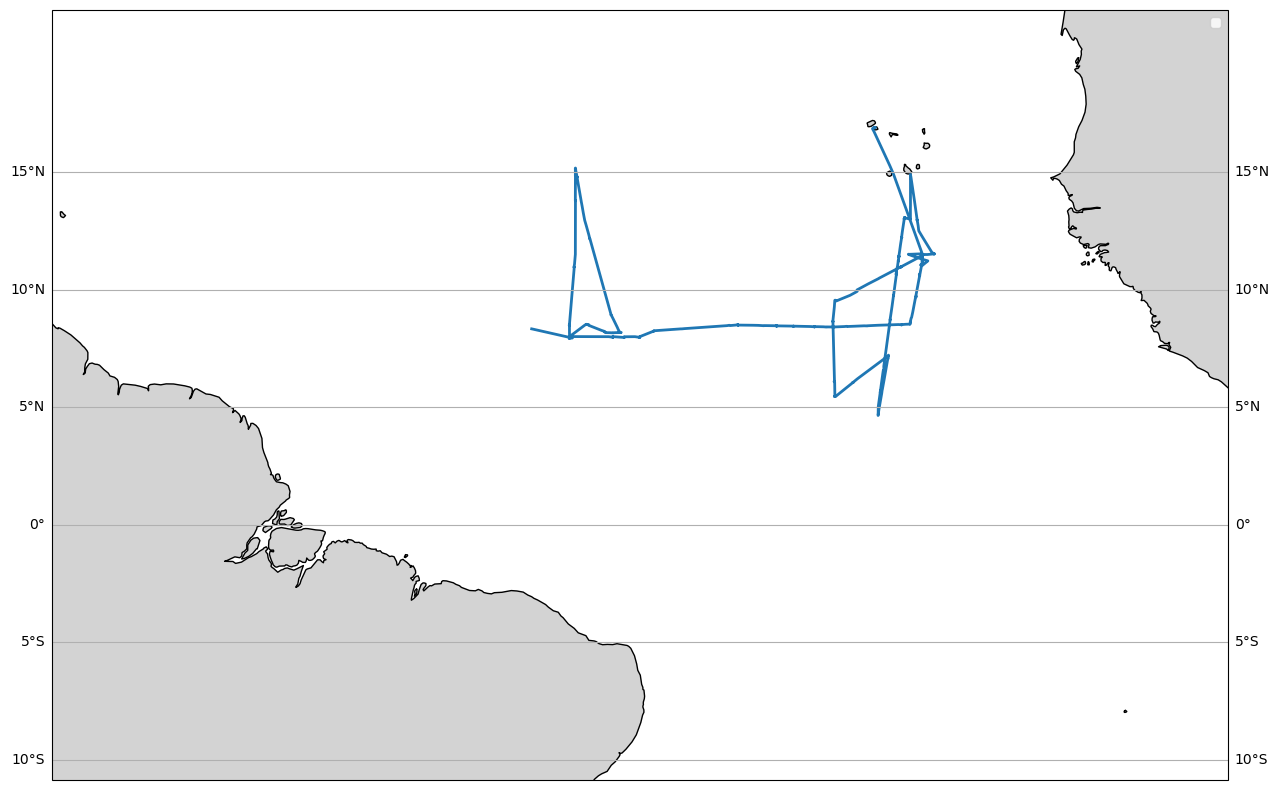

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))
proj = cartopy.crs.PlateCarree()#central_longitude=offset)
ax = fig.add_subplot(111,projection=proj)

plt.plot(shipLon, shipLat, linewidth=2)

# add map features
ax.add_feature(cartopy.feature.LAND,facecolor="lightgray") #land color
# ax.add_feature(cartopy.feature.OCEAN) #ocean color
ax.add_feature(cartopy.feature.COASTLINE)
# ax.add_feature(cartopy.feature.STATES)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
    xlocs=np.arange(140,190,5), ylocs=np.arange(-10,20,5))

# select plotting area
plt_area=[lonMin, lonMax, latMin, latMax] # W,E,S,N
ax.set_extent(plt_area)

plt.legend(loc="upper right")

plt.show()
plt.close()